In [1]:
from sklearn.model_selection import TimeSeriesSplit
from timeSeriesSplit import RollingWindowCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10, title=None):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    yticklabels = list(range(n_splits))
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 0.2, -0.2],
        xlim=[0, len(X)],
    )
    if title is not None:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

def plot_cv_indices_multiindex(cv, X, y, group, ax, n_splits, lw=10, title=None):
    """Create a sample plot for indices of a cross-validation object."""
    stocks = list(X.index.get_level_values(1).unique())
    yticks_agg = []
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        tr_idx = X.iloc[tr].index
        tt_idx = X.iloc[tt].index
        # Fill in indices with the training/test groups
        indices = pd.DataFrame(index=X.index)
        indices['color'] = np.nan
        indices.loc[tr_idx, 'color'] = 0
        indices.loc[tt_idx, 'color'] = 1
        # Visualize the results
        offset = 0
        for stock in stocks:
            dates = indices.index.get_level_values(0).unique()
            yticks = [ii*5 + 0.5 + offset] * len(dates)
            yticks_agg += yticks
            ax.scatter(
                range(len(dates)),
                yticks,
                c=indices.loc[(dates, stock), 'color'],
                marker="_",
                lw=lw,
                cmap=cmap_cv,
                vmin=-0.2,
                vmax=1.2,
            )
            offset += 1.1

    # Formatting
    yticks_agg = list(set(yticks_agg))
    ax.grid(axis='y', linestyle='-')
    ax.set_yticks(yticks_agg)
    ax.set_yticklabels(stocks * n_splits)
    ax.set(
        xlabel="Sample index",
        ylim=[n_splits*5 + 0.2, -0.2],
        xlim=[0, len(X)/4],
    )
    if title is not None:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    
    ax2 = ax.twinx()
    yticklabels = [f"CV {i+1}" for i in range(n_splits)][::-1]
    ax2.spines["left"].set_position(("axes", -0.1))
    ax2.tick_params('both', length=0, width=0, which='minor')
    ax2.tick_params('both', direction='in', which='major')
    ax2.yaxis.set_ticks_position("left")
    ax2.yaxis.set_label_position("left")
    ax2.set_yticks(np.arange(n_splits+1)*5 - 0.2)
    ax2.yaxis.set_major_formatter(ticker.NullFormatter())
    ax2.yaxis.set_minor_locator(ticker.FixedLocator(np.arange(n_splits)*5 + 2.2))
    ax2.yaxis.set_minor_formatter(ticker.FixedFormatter(yticklabels))
    
    return ax, ax2

In [3]:
apple = pd.read_csv("AAPL.csv")
apple['Ticker'] = 'AAPL'
facebook = pd.read_csv("FB.csv")
facebook['Ticker'] = 'FB'
google = pd.read_csv("GOOGL.csv")
google['Ticker'] = 'GOOGL'
nvidia = pd.read_csv("NVDA.csv")
nvidia['Ticker'] = 'NVDA'

In [4]:
stock_df = pd.concat([apple, facebook, google, nvidia])
stock_df = stock_df.set_index(['Date', 'Ticker'], drop=False)
stock_df

,,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,Ticker,,,,,,,,
2021-02-23,AAPL,2021-02-23,123.760002,126.709999,118.389999,125.860001,125.116371,158273000,AAPL
2021-02-24,AAPL,2021-02-24,124.940002,125.559998,122.230003,125.349998,124.609375,111039900,AAPL
2021-02-25,AAPL,2021-02-25,124.680000,126.459999,120.540001,120.989998,120.275139,148199500,AAPL
2021-02-26,AAPL,2021-02-26,122.589996,124.849998,121.199997,121.260002,120.543549,164560400,AAPL
2021-03-01,AAPL,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.034966,116307900,AAPL
...,...,...,...,...,...,...,...,...,...
2022-02-15,NVDA,2022-02-15,249.490005,265.450012,247.839996,264.950012,264.950012,70175300,NVDA
2022-02-16,NVDA,2022-02-16,262.589996,265.820007,255.520004,265.109985,265.109985,73267600,NVDA
2022-02-17,NVDA,2022-02-17,256.299988,257.850006,241.649994,245.070007,245.070007,81059500,NVDA


In [5]:
stock_df.index.get_level_values(0).unique()

Index(['2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-03-01',
       '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-08',
       ...
       '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
       '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-22'],
      dtype='object', name='Date', length=253)

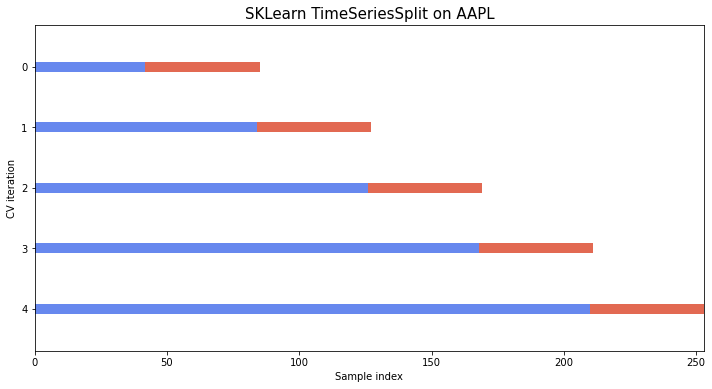

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
tss1 = TimeSeriesSplit(n_splits=5)
plot_cv_indices(tss1, apple[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="SKLearn TimeSeriesSplit on AAPL")

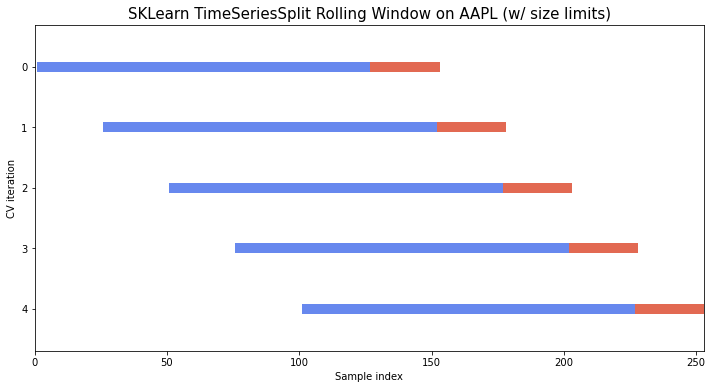

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
# rolling window with TimeSeriesSplit is possible but the math gets quite complex if you instead wamt an exotic train proportion
test_size = int((len(apple) / 2) / 5)
max_train_size = len(apple) // 2
tss1 = TimeSeriesSplit(n_splits=5, max_train_size=max_train_size, test_size=test_size)
plot_cv_indices(tss1, apple[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="SKLearn TimeSeriesSplit Rolling Window on AAPL (w/ size limits)")

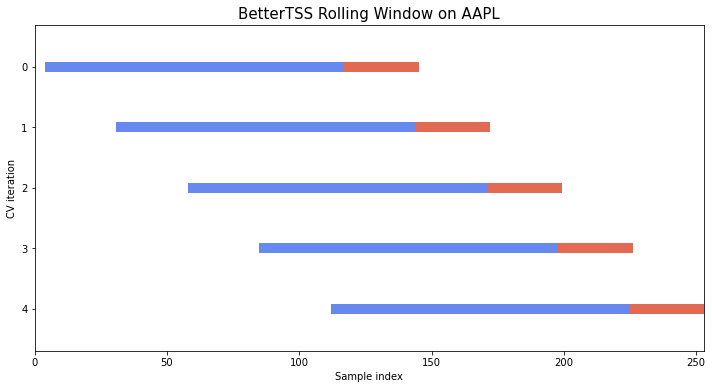

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
tss1 = RollingWindowCV(train_prop=0.8, n_folds=5, bias='right')
plot_cv_indices(tss1, apple[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="BetterTSS Rolling Window on AAPL")

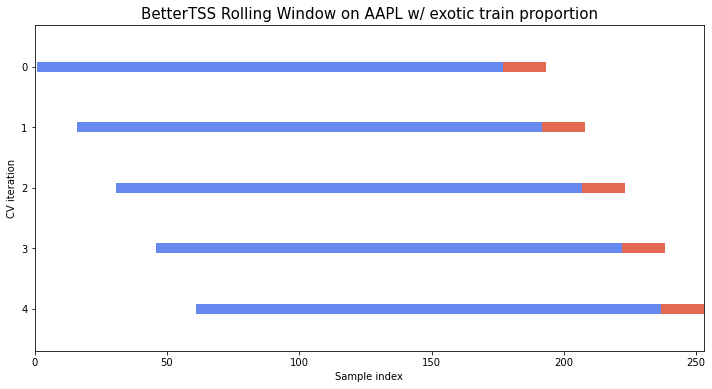

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
tss1 = RollingWindowCV(train_prop=0.92, n_folds=5, bias='right')
plot_cv_indices(tss1, apple[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="BetterTSS Rolling Window on AAPL w/ exotic train proportion")

(<matplotlib.axes._subplots.AxesSubplot at 0x1cab19c5308>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cab1cb3e88>)

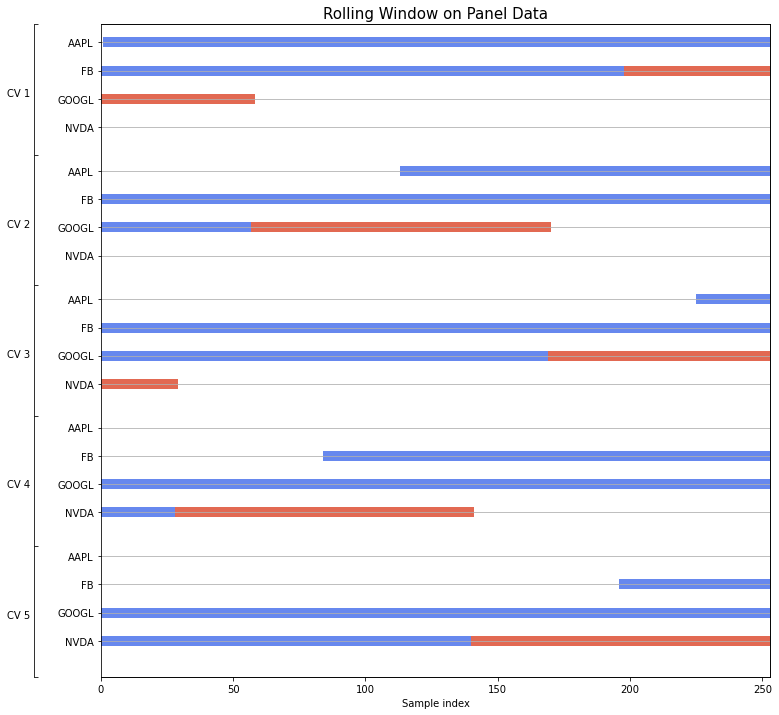

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
tss1 = RollingWindowCV(train_prop=0.8, n_folds=5)
plot_cv_indices_multiindex(tss1, stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="Rolling Window on Panel Data")

(<matplotlib.axes._subplots.AxesSubplot at 0x1cab1b11d48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cab1ddf208>)

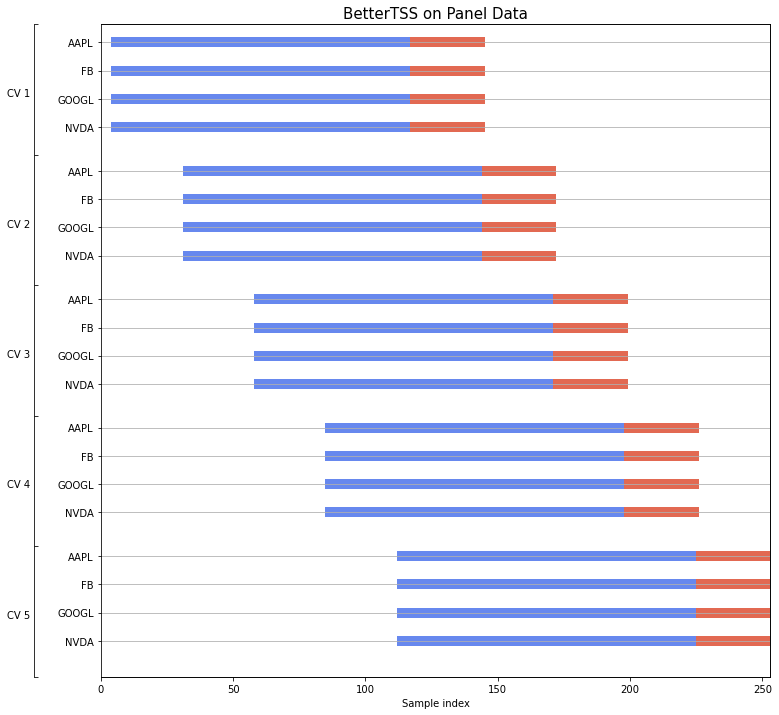

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
tss1 = RollingWindowCV(time_column=stock_df['Date'], train_prop=0.8, n_folds=5, bias='right')
plot_cv_indices_multiindex(tss1, stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="BetterTSS on Panel Data")

ValueError: batch_size must be decimal between 0 and 1.0 or whole number greater than or equal to 1 (got 3.571428571428568).

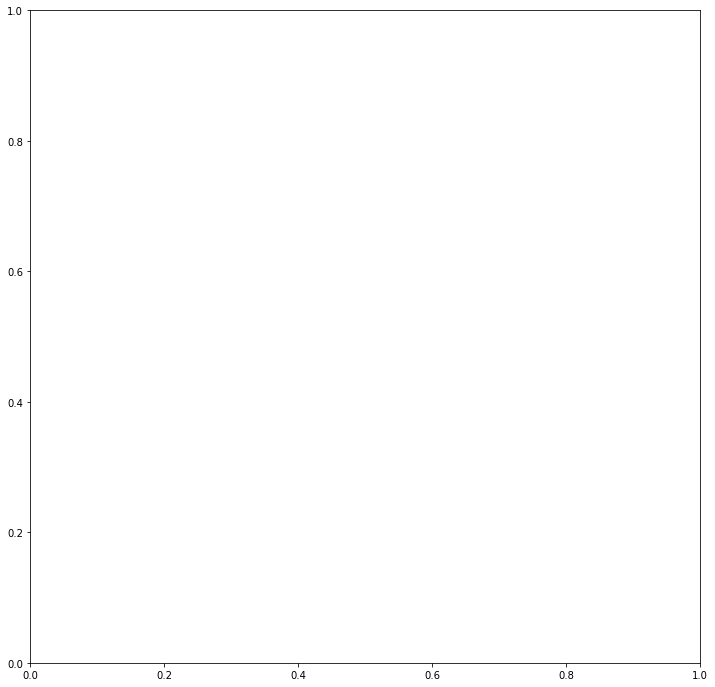

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
tss1 = RollingWindowCV(time_column=stock_df['Date'], train_prop=0.8, n_folds=5, slide=-1.9, bias='right')
plot_cv_indices_multiindex(tss1, stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="BetterTSS on Panel Data with slide")

(<matplotlib.axes._subplots.AxesSubplot at 0x1cab3027548>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cab30ab2c8>)

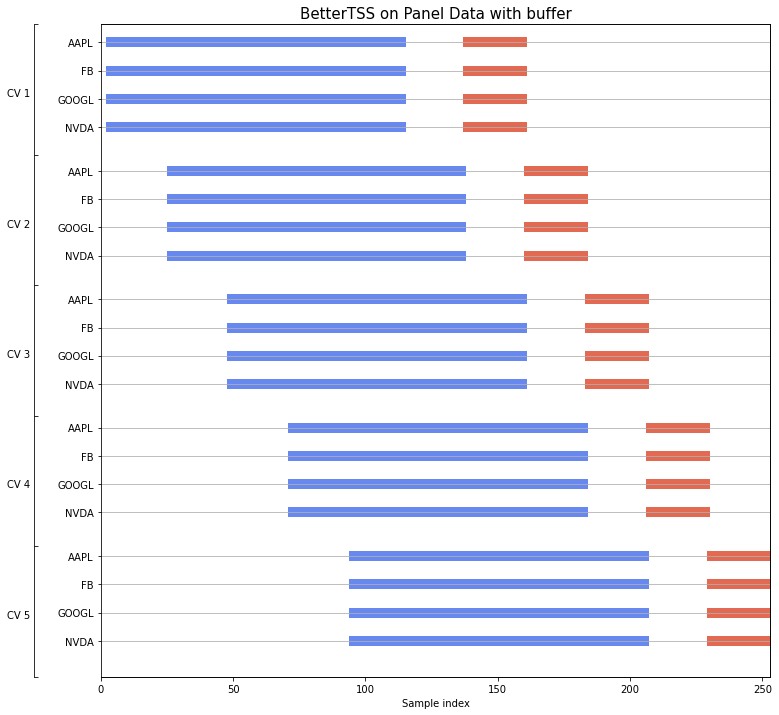

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
tss1 = RollingWindowCV(time_column=stock_df['Date'], train_prop=0.85, n_folds=5, buffer_prop=0.15, bias='right')
plot_cv_indices_multiindex(tss1, stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], None, None, ax, 5, title="BetterTSS on Panel Data with buffer")